# pandas入門
## 目次
- csvの読み込み
- 先頭と行をデータの形(何行,何列)を確認
- 不要な行と列を取り除く
- indexを付け替える
- 平均気温をplotしてみる
- 列や行を選択する
    - columnで指定
    - indexで指定
- loc,iloc,ixでの複雑な選択
    - loc(ラベルを使って絞込)
    - iloc(番号での絞込)
    - ix(ラベルか番号での絞込)

## 用語の整理
### Dataframe
表形式の2次元データ
`df`

#### column
dataframeの列
`list(df)`

#### index
dataframeの行
`df.index`

### Series
Dataframeからcolumnを選択した1次元データ
`df[平均気温]`

In [1]:
# パッケージのimport
import pandas as pd

## csvの読み込み

In [5]:
df = pd.read_csv('./data/気象庁のデータ.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 0: invalid start byte

```
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 0: invalid start byte
```

と出ているのでおそらく文字コードとかのエラー

In [8]:
df = pd.read_csv('./data/気象庁のデータ.csv', encoding='Shift-jis')

今度は読み込めた

## 先頭と行をデータの形(何行,何列)を確認

In [7]:
# 先頭
df.head()

ダウンロードした時刻：2017/11/20 22:35:50
NaN     千葉      千葉      千葉      千葉         千葉     千葉                                    千葉
        平均気温(℃) 最高気温(℃) 最低気温(℃) 降水量の合計(mm) 日照率(％) 平均風速(m/s)                       日照時間(時間)
        NaN     NaN     NaN     NaN        NaN    NaN                                  NaN
2012年1月 4.4     11.5    -1.9    47.0       57     3.3                                176.4
2012年2月 5.2     17.4    -1.6    103.5      46     3.3                                143.5

In [9]:
# 行末
df.tail()

,,,,,,,ダウンロードした時刻：2017/11/20 22:35:50
2016年8月,27.3,37.7,21.2,250.5,40,4.0,168.8
2016年9月,24.9,32.3,18.3,286.0,24,3.3,90.3
2016年10月,19.4,32.8,10.5,104.0,38,3.0,132.2
2016年11月,12.1,21.3,0.8,147.0,40,2.9,123.1
2016年12月,9.9,21.7,1.4,57.0,61,3.4,184.6


In [12]:
# 行列
df.shape

(63, 1)

`(63, 1)`となっているのでおかしい

## 不要な行と列を取り除く
### herd側にいらない行が入っている
- 1: いらない
- 2: いらない
- 3: 列のラベル
- 4: いらない
- 5: ここからデータ

#### とりあえず、参考サイトを確認
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv

http://pythondatascience.plavox.info/pandas/%E8%A1%8C%E3%83%BB%E5%88%97%E3%82%92%E5%89%8A%E9%99%A4

In [41]:
# headerオプションが使えそう
df = pd.read_csv('./data/気象庁のデータ.csv', encoding='Shift-jis',header=2)
df.head()

,Unnamed: 0,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照率(％),平均風速(m/s),日照時間(時間)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012年1月,4.4,11.5,-1.9,47.0,57.0,3.3,176.4
2,2012年2月,5.2,17.4,-1.6,103.5,46.0,3.3,143.5
3,2012年3月,8.7,20.4,2.0,134.0,39.0,3.8,143.0
4,2012年4月,14.0,24.3,4.5,111.0,42.0,4.2,165.8


In [42]:
# まだ0行目にNaNが入っているのでこの行を削除する
df = df.dropna()
df.head()

,Unnamed: 0,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照率(％),平均風速(m/s),日照時間(時間)
1,2012年1月,4.4,11.5,-1.9,47.0,57.0,3.3,176.4
2,2012年2月,5.2,17.4,-1.6,103.5,46.0,3.3,143.5
3,2012年3月,8.7,20.4,2.0,134.0,39.0,3.8,143.0
4,2012年4月,14.0,24.3,4.5,111.0,42.0,4.2,165.8
5,2012年5月,19.2,27.4,10.5,169.0,45.0,4.0,195.1


In [43]:
df.shape

(60, 8)

`(60, 8)` ６０行８列なので大丈夫っぽい

## indexを付け替える
- 現在indexが数字になっている
- 一意に決まっている日付(1列目)をindexにしたい。

In [50]:
# df['Unnamed: ']はstrなのでdateに変換
date = df['Unnamed: 0'].rename(columns={'Unnamed: 0': 'date'})
date = pd.to_datetime(date, format='%Y年%m月', errors='ignore')
date.head()

1   2012-01-01
2   2012-02-01
3   2012-03-01
4   2012-04-01
5   2012-05-01
dtype: datetime64[ns]

In [52]:
df.index = date
df.head()

,Unnamed: 0,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照率(％),平均風速(m/s),日照時間(時間)
2012-01-01,2012年1月,4.4,11.5,-1.9,47.0,57.0,3.3,176.4
2012-02-01,2012年2月,5.2,17.4,-1.6,103.5,46.0,3.3,143.5
2012-03-01,2012年3月,8.7,20.4,2.0,134.0,39.0,3.8,143.0
2012-04-01,2012年4月,14.0,24.3,4.5,111.0,42.0,4.2,165.8
2012-05-01,2012年5月,19.2,27.4,10.5,169.0,45.0,4.0,195.1


In [60]:
# df['Unnamed: 0']は用済みなので削除
if 'Unnamed: 0' in df.columns:
    del df['Unnamed: 0']
df.head(12)

,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照率(％),平均風速(m/s),日照時間(時間)
2012-01-01,4.4,11.5,-1.9,47.0,57.0,3.3,176.4
2012-02-01,5.2,17.4,-1.6,103.5,46.0,3.3,143.5
2012-03-01,8.7,20.4,2.0,134.0,39.0,3.8,143.0
2012-04-01,14.0,24.3,4.5,111.0,42.0,4.2,165.8
2012-05-01,19.2,27.4,10.5,169.0,45.0,4.0,195.1
2012-06-01,20.7,28.5,14.3,192.5,30.0,4.2,129.0
2012-07-01,25.7,34.3,17.5,94.0,41.0,4.2,181.5
2012-08-01,28.2,35.4,21.4,108.0,58.0,4.0,242.3
2012-09-01,25.5,33.1,17.1,143.5,46.0,3.6,169.5
2012-10-01,18.9,28.8,11.2,268.0,46.0,3.5,162.0


## 平均気温をplotしてみる

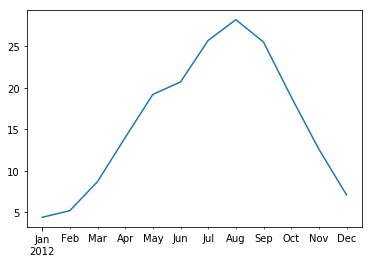

In [61]:
%matplotlib inline
df.head(12)['平均気温(℃)'].plot()

## 列や行を選択する

### columnで指定

In [64]:
df['平均気温(℃)'].head()

2012-01-01     4.4
2012-02-01     5.2
2012-03-01     8.7
2012-04-01    14.0
2012-05-01    19.2
Name: 平均気温(℃), dtype: float64

In [65]:
# 複数の列を取ることも
df[['最高気温(℃)','最高気温(℃)']].head()

,最高気温(℃),最高気温(℃)
2012-01-01,11.5,11.5
2012-02-01,17.4,17.4
2012-03-01,20.4,20.4
2012-04-01,24.3,24.3
2012-05-01,27.4,27.4


### indexで指定

In [72]:
# rengeを指定すると行で絞りこめます。
df['2012-02-01':'2012-12-01']

,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),日照率(％),平均風速(m/s),日照時間(時間)
2012-02-01,5.2,17.4,-1.6,103.5,46.0,3.3,143.5
2012-03-01,8.7,20.4,2.0,134.0,39.0,3.8,143.0
2012-04-01,14.0,24.3,4.5,111.0,42.0,4.2,165.8
2012-05-01,19.2,27.4,10.5,169.0,45.0,4.0,195.1
2012-06-01,20.7,28.5,14.3,192.5,30.0,4.2,129.0
2012-07-01,25.7,34.3,17.5,94.0,41.0,4.2,181.5
2012-08-01,28.2,35.4,21.4,108.0,58.0,4.0,242.3
2012-09-01,25.5,33.1,17.1,143.5,46.0,3.6,169.5
2012-10-01,18.9,28.8,11.2,268.0,46.0,3.5,162.0
2012-11-01,12.6,21.3,3.7,168.5,51.0,3.2,157.2


## loc,iloc,ixでの複雑な絞込
http://ailaby.com/lox_iloc_ix/

### loc(ラベルを使って絞込)

In [80]:
# loc は 行、列をラベルで指定します。
# date型のindeｘはlocで指定できない(?)
# 行ラベルを指定(date型だと失敗)
# df.loc[['2012-01-01','2013-01-01','2014-01-01','2015-01-01']]
# 列ラベルを指定
df.loc[:, ['平均気温(℃)','最高気温(℃)']].head()
# 行と列ラベルを指定 (date型だと失敗)
# df.loc[['2012-01-01','2013-01-01','2014-01-01','2015-01-01'],['平均気温(℃)','最高気温(℃)']]

,平均気温(℃),最高気温(℃)
2012-01-01,4.4,11.5
2012-02-01,5.2,17.4
2012-03-01,8.7,20.4
2012-04-01,14.0,24.3
2012-05-01,19.2,27.4


### iloc(番号での絞込)

In [85]:
# 行番号を指定
df.iloc[[2,3]]
# 列番号を指定
df.iloc[:, [1,2]]
# 行、列番号を指定 
df.iloc[[2,3], [1,2]]
# 行、列番号をRengeで指定
df.iloc[2:4,1:3]

,最高気温(℃),最低気温(℃)
2012-03-01,20.4,2.0
2012-04-01,24.3,4.5


### ix(ラベルか番号での絞込)

In [93]:
# datetimeindexをindexに指定した場合は行の絞込はラベルのみ可能
# 行を指定（ラベル）
df.ix['2014-01-01':'2014-02-01']

# 列を指定（ラベル または 番号）
df.ix[:,['平均気温(℃)','最高気温(℃)']]
df.ix[:,[1,2]]

# 行、列を指定（ラベル または 番号）
df.ix['2014-01-01':'2014-02-01', ['平均気温(℃)','最高気温(℃)' ]]
df.ix['2014-01-01':'2014-02-01', [1,2]]

,最高気温(℃),最低気温(℃)
2014-01-01,15.6,-1.0
2014-02-01,20.3,-1.6
